In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from anomaly_detection import anomaly_detect_ts as tad

#ts = pd.read_csv('score.csv').set_index('timestamp')['count']
ts = pd.read_csv('./data/权力的游戏/record_5_new.txt',sep='\t',index_col=0,names=["timestamp","groundtruth","predict","edit1","edit2","proportion","recall","accuracy","recall_1","recall_2","tpfp","tnfn"])
ts.index = ['2019-'+date for date in ts.index]
ts.head()

,groundtruth,predict,edit1,edit2,proportion,recall,accuracy,recall_1,recall_2,tpfp,tnfn
2019-04-01,0,1972,2162.162826,2169.677419,2248,0.956522,0.956989,0.956522,1.000000,88,5
2019-04-02,0,1949,2177.840000,2207.970330,2313,0.916667,0.890000,0.916667,0.250000,91,9
2019-04-03,0,1276,844.650207,1147.491924,1598,0.912621,0.830986,0.912621,0.615385,109,33
2019-04-04,0,964,1070.924895,1061.621947,1029,0.921569,0.901639,0.921569,0.800000,49,12
2019-04-05,0,638,674.525000,693.285714,790,0.944444,0.925000,0.944444,0.750000,35,5


In [2]:
edit_ts = ts['edit1']
edit_ts.head()

2019-04-01    2162.162826
2019-04-02    2177.840000
2019-04-03     844.650207
2019-04-04    1070.924895
2019-04-05     674.525000
Name: edit1, dtype: float64

datetime64[ns]
datetime64[ns]
2019-04-01    2162.162826
2019-04-02    2177.840000
2019-04-03     844.650207
2019-04-04    1070.924895
2019-04-05     674.525000
2019-04-06     955.452381
2019-04-07     553.200000
2019-04-08     237.000000
2019-04-09     549.000000
2019-04-10    1188.465579
2019-04-11     451.675325
2019-04-12    1789.824364
2019-04-13     948.961637
2019-04-14    1590.062893
2019-04-15    2737.703030
2019-04-16    1611.333333
2019-04-17    1501.219477
2019-04-18    2006.384615
2019-04-19    1035.440678
2019-04-20     819.963993
2019-04-21    2278.781687
2019-04-22    1395.856534
2019-04-23     912.530138
2019-04-24     273.735192
2019-04-25     444.382979
2019-04-26     384.027692
2019-04-27     489.411508
2019-04-28     161.911111
2019-04-29    2758.711165
2019-04-30    3442.128308
                 ...     
2019-05-02    1179.120000
2019-05-03     929.043767
2019-05-04     871.112299
2019-05-05     808.360000
2019-05-06   -2187.322211
2019-05-07    -127.555556
2019-05-

[Timestamp('2019-04-01 00:00:00'), Timestamp('2019-04-15 00:00:00'), Timestamp('2019-04-22 00:00:00'), Timestamp('2019-04-29 00:00:00'), Timestamp('2019-05-06 00:00:00'), Timestamp('2019-05-13 00:00:00'), Timestamp('2019-05-20 00:00:00')]
2019-04-29    1.249128
2019-05-13    1.314193
2019-04-15    1.373142
2019-04-30    1.398810
2019-04-01    1.258939
2019-05-06    1.156782
2019-05-20    1.136086
2019-04-21    0.977370
2019-04-22    1.016877
2019-04-02    1.044200
2019-05-01    1.106051
2019-04-18    0.985408
2019-04-12    0.976634
2019-05-23    0.930569
2019-04-16    0.914724
2019-04-14    0.907727
2019-05-21    0.899121
2019-05-14    0.928664
2019-04-17    0.937845
2019-05-11    0.912030
2019-05-18    0.949111
2019-05-07    0.784418
2019-04-10    0.745425
2019-04-08    0.669173
dtype: float64
2019-04-29    2.301025
2019-05-13    2.090761
2019-04-15    2.184544
2019-04-30    3.263889
2019-04-01    2.098232
2019-05-06    1.840334
2019-05-20    1.807410
2019-04-21    2.137997
2019-04-22

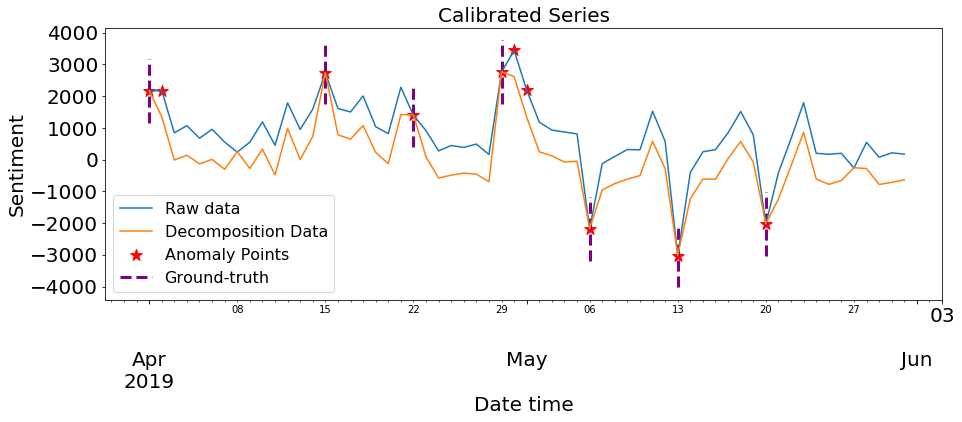

In [30]:
anom_dict = tad(edit_ts, max_anoms=0.4, direction='both', alpha=0.1, piecewise_median_period_weeks=2,period_override=7)
anoms = anom_dict['anoms']
expected = anom_dict['shesd_data']
diata = anom_dict['s_data']
print(expected)
degree = anom_dict['degree']
de_dis = anom_dict['de_dis']
free = anom_dict['free']



fig, ax = plt.subplots(1, figsize=(15,5))
#diata.plot(ax=ax[0],label="Diata")
edit_ts.plot(ax=ax,label="Raw data")
ax.scatter(anoms.index.values, anoms, s=150,color='red',marker='*',label='Anomaly Points')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Date time',fontsize=20)
ax.set_ylabel('Sentiment',fontsize=20)
ax.set_title('Calibrated Series',fontsize=20);

expected.plot(ax=ax,label="Decomposition Data")
df = pd.DataFrame(edit_ts)
ground_truth_index = [0,14,21,28,35,42,49]
ground_truth = [df.index[i] for i in ground_truth_index]
print(ground_truth)
groundtruth_points = pd.DataFrame(df[['edit1']].loc[ground_truth].sort_index())
plt.vlines(groundtruth_points.index, groundtruth_points.iloc[:,0]-1000, groundtruth_points.iloc[:,0]+1000, colors = "purple", linestyles = "dashed",lw=3,label='Ground-truth')
#ax.scatter(groundtruth_points.index,groundtruth_points.iloc[:,0],color='',s=200,marker='o',edgecolors='b',label='Groudtruth Points')
ax.legend(fontsize=16)
print(degree)
print(de_dis)


'''
critical = pd.Series(1,index=edit_ts.index)
critical.plot(ax=ax[1],label="Raw data")
ax[1].scatter(degree.index.values,degree,color='red',marker='*',label='Groudtruth Points')
ax[1].scatter(de_dis.index.values,de_dis,color='',marker='o',edgecolors='b',label='Groudtruth Point')
'''
#ax[1].scatter(free.index.values,free,color='',marker='o',edgecolors='g',label='Groudtruth Point')
plt.show()


In [4]:
ts = pd.read_csv('./data/权力的游戏/record_5_new.txt',sep='\t',index_col=0,names=["timestamp","groundtruth","predict","edit1","edit2","proportion","recall","accuracy","recall_1","recall_2","tpfp","tnfn"])['predict']
ts.head()

timestamp
04-01    1972
04-02    1949
04-03    1276
04-04     964
04-05     638
Name: predict, dtype: int64

In [5]:
ts.index = ['2019-'+date for date in ts.index]
ts.head()

2019-04-01    1972
2019-04-02    1949
2019-04-03    1276
2019-04-04     964
2019-04-05     638
Name: predict, dtype: int64

datetime64[ns]
datetime64[ns]
2019-04-01    1972
2019-04-02    1949
2019-04-03    1276
2019-04-04     964
2019-04-05     638
2019-04-06     868
2019-04-07     424
2019-04-08     373
2019-04-09     588
2019-04-10     923
2019-04-11     497
2019-04-12    1573
2019-04-13     784
2019-04-14    1204
2019-04-15    1825
2019-04-16    1486
2019-04-17    1090
2019-04-18    1649
2019-04-19    1042
2019-04-20     834
2019-04-21    2233
2019-04-22    1711
2019-04-23     830
2019-04-24     374
2019-04-25     312
2019-04-26     299
2019-04-27     455
2019-04-28     263
2019-04-29    1360
2019-04-30    1954
              ... 
2019-05-02     861
2019-05-03     653
2019-05-04     926
2019-05-05     651
2019-05-06    -883
2019-05-07      12
2019-05-08     297
2019-05-09     381
2019-05-10     327
2019-05-11    1592
2019-05-12     487
2019-05-13   -1931
2019-05-14    -280
2019-05-15     211
2019-05-16     372
2019-05-17     588
2019-05-18    1507
2019-05-19     772
2019-05-20    -144
2019-05-21     523
2

[Timestamp('2019-04-01 00:00:00'), Timestamp('2019-04-15 00:00:00'), Timestamp('2019-04-22 00:00:00'), Timestamp('2019-04-29 00:00:00'), Timestamp('2019-05-06 00:00:00'), Timestamp('2019-05-13 00:00:00'), Timestamp('2019-05-20 00:00:00')]
2019-05-13    1.297491
2019-04-01    1.104094
2019-04-15    1.067974
2019-04-21    1.108333
2019-04-22    1.114761
2019-04-30    1.050760
2019-04-02    1.111223
2019-04-29    1.027933
2019-05-23    0.987320
2019-04-12    1.001582
2019-04-18    1.008559
2019-05-06    1.050247
2019-05-01    1.092416
2019-04-16    1.069824
2019-05-11    1.017241
2019-05-14    1.030158
2019-04-03    1.021342
2019-05-18    1.078246
2019-04-14    0.975790
2019-04-17    0.985335
2019-04-19    1.017933
2019-04-10    0.897710
2019-04-04    0.836295
2019-04-23    0.769696
dtype: float64
2019-05-13    2.838262
2019-04-01    2.033857
2019-04-15    4.672386
2019-04-21    6.465275
2019-04-22    1.773484
2019-04-30    2.451773
2019-04-02    2.592855
2019-04-29    1.893561
2019-05-23

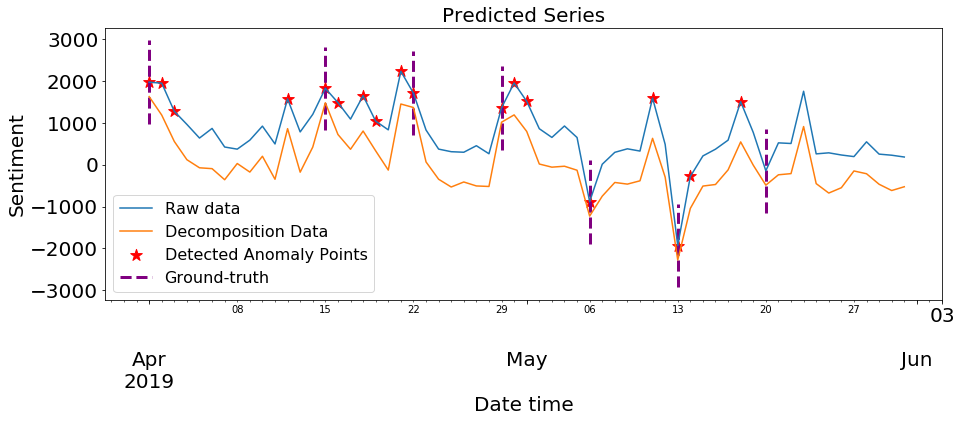

In [29]:
anom_dict = tad(ts, max_anoms=0.4, direction='both', alpha=0.1, piecewise_median_period_weeks=2,period_override=7)
anoms = anom_dict['anoms']
expected = anom_dict['shesd_data']
diata = anom_dict['s_data']
print(expected)
degree = anom_dict['degree']
de_dis = anom_dict['de_dis']
free = anom_dict['free']


fig, ax = plt.subplots(1, figsize=(15,5))
#diata.plot(ax=ax[0],label="Diata")
ts.plot(ax=ax,label="Raw data")
ax.scatter(anoms.index.values, anoms, s=150, color='red',marker='*',label='Detected Anomaly Points')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Date time',fontsize=20)
ax.set_ylabel('Sentiment',fontsize=20)
ax.set_title('Predicted Series',fontsize=20);

expected.plot(ax=ax,label="Decomposition Data")
df = pd.DataFrame(ts)
ground_truth_index = [0,14,21,28,35,42,49]
ground_truth = [df.index[i] for i in ground_truth_index]
print(ground_truth)
groundtruth_points = pd.DataFrame(df[['predict']].loc[ground_truth].sort_index())
#ax.scatter(groundtruth_points.index,groundtruth_points.iloc[:,0],color='',s=200,marker='o',edgecolors='b',label='Groudtruth Points')
plt.vlines(groundtruth_points.index, groundtruth_points.iloc[:,0]-1000, groundtruth_points.iloc[:,0]+1000, colors = "purple", linestyles = "dashed",lw=3,label='Ground-truth')

ax.legend(fontsize=16)
print(degree)
print(de_dis)

'''
critical = pd.Series(1,index=ts.index)
critical.plot(ax=ax[1],label="Raw data")
ax[1].scatter(degree.index.values,degree,color='red',marker='*',label='Groudtruth Points')
ax[1].scatter(de_dis.index.values,de_dis,color='',marker='o',edgecolors='b',label='Groudtruth Point')
'''
#ax[1].scatter(free.index.values,free,color='',marker='o',edgecolors='g',label='Groudtruth Point')
plt.show()

